In [1]:
from fastai.vision.all import *
import gradio as gr
import timm

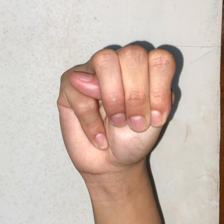

In [36]:
im = PILImage.create('M1.jpg')
im.thumbnail((224,224))
im

In [37]:
learn = load_learner('model-augmentasi100.pkl')

In [38]:
learn.predict(im)

('E',
 tensor(4),
 tensor([5.9924e-02, 3.5117e-04, 1.0449e-04, 1.0707e-08, 7.0458e-01, 2.1225e-09,
         1.0007e-06, 4.1751e-06, 1.0462e-06, 3.2922e-09, 1.1361e-06, 2.3500e-01,
         1.1370e-07, 1.1613e-05, 6.9961e-08, 4.5063e-06, 5.6977e-10, 4.9272e-06,
         1.4421e-06, 2.7704e-13, 2.6007e-11, 2.6541e-06, 5.0747e-11, 5.9118e-06]))

In [27]:
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [28]:
classify_image(im)
result = classify_image(im)
result_without_test = {category: probability for category, probability in result.items() if category != 'test'}
print(result_without_test)


{'A': 9.279665391659364e-05, 'B': 0.0006041149608790874, 'C': 0.5245897769927979, 'D': 0.012687671929597855, 'E': 8.741264423406392e-07, 'F': 0.00015132487169466913, 'G': 0.00023230980150401592, 'H': 1.316620455327211e-06, 'I': 2.5613732645979326e-07, 'K': 3.273364868050521e-08, 'L': 0.0009057262795977294, 'M': 2.5115369339800964e-07, 'N': 0.004246762488037348, 'O': 0.034236155450344086, 'P': 4.0485687350155786e-05, 'Q': 0.4168914556503296, 'R': 0.00519024021923542, 'S': 5.378454375204456e-07, 'T': 1.6671250477884314e-06, 'U': 3.9143474168668035e-06, 'V': 6.7835853769793175e-06, 'W': 1.1304272220513667e-06, 'X': 1.5608899275321164e-06, 'Y': 0.00011289071699138731}


In [9]:
m = learn.model
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  